Тарабонда Герман
ДЗ 2

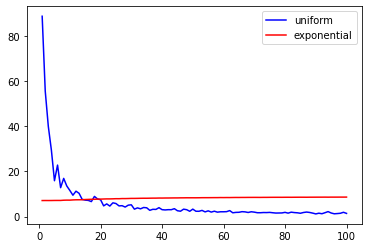

In [1]:
import random
import math
import matplotlib.pyplot as plt

def generate_uniform_dist(theta, k, quantity):
    return [random.randint(0, theta) ** k for _ in range(quantity)]

def finding_uniform_dist_theta(k, m):
    return ((k + 1) * m) ** (1 / k)

def generate_exponent_dist(theta, k, quantity):
    return [random.expovariate(theta) ** k for _ in range(quantity)]

def finding_exponent_dist_theta(k, m):
    return (m / math.factorial(k)) ** (1 / k)

def get_mean_std(ks, theta, generator, finding_theta):
    results = []
    for k in ks:
        std = []
        for _ in range(100):
            X = generator(theta, k, 1000)
            m = sum(X) / 1000
            std.append(finding_theta(k, m))
        std = list(map(lambda x: (x - theta) ** 2, std))
        results.append(sum(std) / 100)
    return results

ks = [i + 1 for i in range(100)]
results_uniform = get_mean_std(ks, 500, generate_uniform_dist, finding_uniform_dist_theta)
results_exponent = get_mean_std(ks, 3, generate_exponent_dist, finding_exponent_dist_theta)

#plot graphics
plt.plot(ks, results_uniform, color='blue', label='uniform')
plt.plot(ks, results_exponent, color='red', label='exponential')
plt.legend()

plt.show()